# Týden 9. Vizualizace dat pomocí Seaborn

Seaborn je knihovna pro tvorbu statistických grafů v jazyce Python. Je postavena na matplotlib a úzce integrována s datovými strukturami pandas.

## Instalace

Oficiální verze [Seaborn](https://seaborn.pydata.org/installing.html) lze nainstalovat z PyPI:

```
pip install seaborn
```

Knihovna je také součástí distribuce Anaconda a lze ji nainstalovat pomocí programu conda:

```
conda install seaborn
```

V zákulisí používá seaborn ke kreslení grafů program matplotlib. Pro interaktivní práci se doporučuje používat rozhraní Jupyter v režimu matplotlib, jinak budete muset volat `matplotlib.pyplot.show()`, když budete chtít zobrazit graf. Jako vždy, nejdříve naimportuje potřebné knihovny. 

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Nasledující krok nastaví stýl grafů a taky ovlivní vzhled všech grafů matplotlibu, i když je nevytváříte pomocí seabornu. Kromě výchozího tématu existuje několik dalších možností a můžete nezávisle ovládat styl a měřítko grafu, abyste mohli rychle převádět svou práci mezi prezentačními kontexty (např. vytvořit verzi svého obrázku, která bude mít čitelné písmo při promítání během přednášky). Pokud vám vyhovuje výchozí nastavení matplotlib nebo dáváte přednost jinému stýlu, můžete tento krok přeskočit a nadále používat funkce pro vykreslování v seabornu. K dispozici je pět přednastavených stýlů Seaborn: `darkgrid`, `whitegrid`, `dark`, `white` a `ticks`. Výchozí stýl je `darkgrid`.

In [43]:
sns.set_theme(style='darkgrid')

Dále naimportujeme nam již znamý dataset a rovnou očistíme data: 

In [44]:
df = pd.read_csv('realtor-data.csv')
df = df.dropna()
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
829,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
3380,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5083,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
5387,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
9053,for_sale,110000.0,7.0,3.0,0.09,"B-2 Monte Elena, Dorado, PR, 00949",B-2 Monte Elena,Dorado,Puerto Rico,949.0,1192.0,2019-06-28


## Vizualizace kategoriálních dat
### Kategoriální rozptylové grafy
Výchozí reprezentace dat v `catplot()` používá rozptylový graf. Ve skutečnosti existují v Seaborn dva různé kategoriální rozptylové grafy. Využívají různé přístupy k řešení hlavního problému při reprezentaci kategoriálních dat pomocí rozptylového grafu, který spočívá v tom, že všechny body patřící do jedné kategorie by spadaly na stejnou pozici podél osy odpovídající kategoriální proměnné. Přístup použitý funkcí `stripplot()`, která je výchozím "druhem" v `catplot()`, spočívá v úpravě polohy bodů na kategoriální ose s malým množstvím náhodného "kolísání":

In [46]:
df = df.dropna()
df = df[~df['state'].isin(['Puerto Rico', 'Virgin Islands'])]
df = df[df['price'] < 3e7]
df = df[df['house_size'] < 2e4]
df = df[df['bed'] <= 10]
df['sold_date'] = pd.to_datetime(df['sold_date'])
df['year'] = df['sold_date'].dt.year
df = df[df['year'] >= 2000]
df['rel_price'] = df['price'] / df['house_size']

Naskedující graf zobrazuje vztah mezi 4 proměnnými v souboru dat tipů pomocí jediného volání funkce seaborn `relplot()`. Všimněte si, že jsme uvedli pouze názvy proměnných a jejich role v grafu. Na rozdíl od přímého použití matplotlib nebylo nutné specifikovat atributy prvků grafu ve smyslu hodnot barev nebo kódů značek. V zákulisí seaborn obstaral překlad z hodnot v datovém rámci na argumenty, kterým rozumí matplotlib.

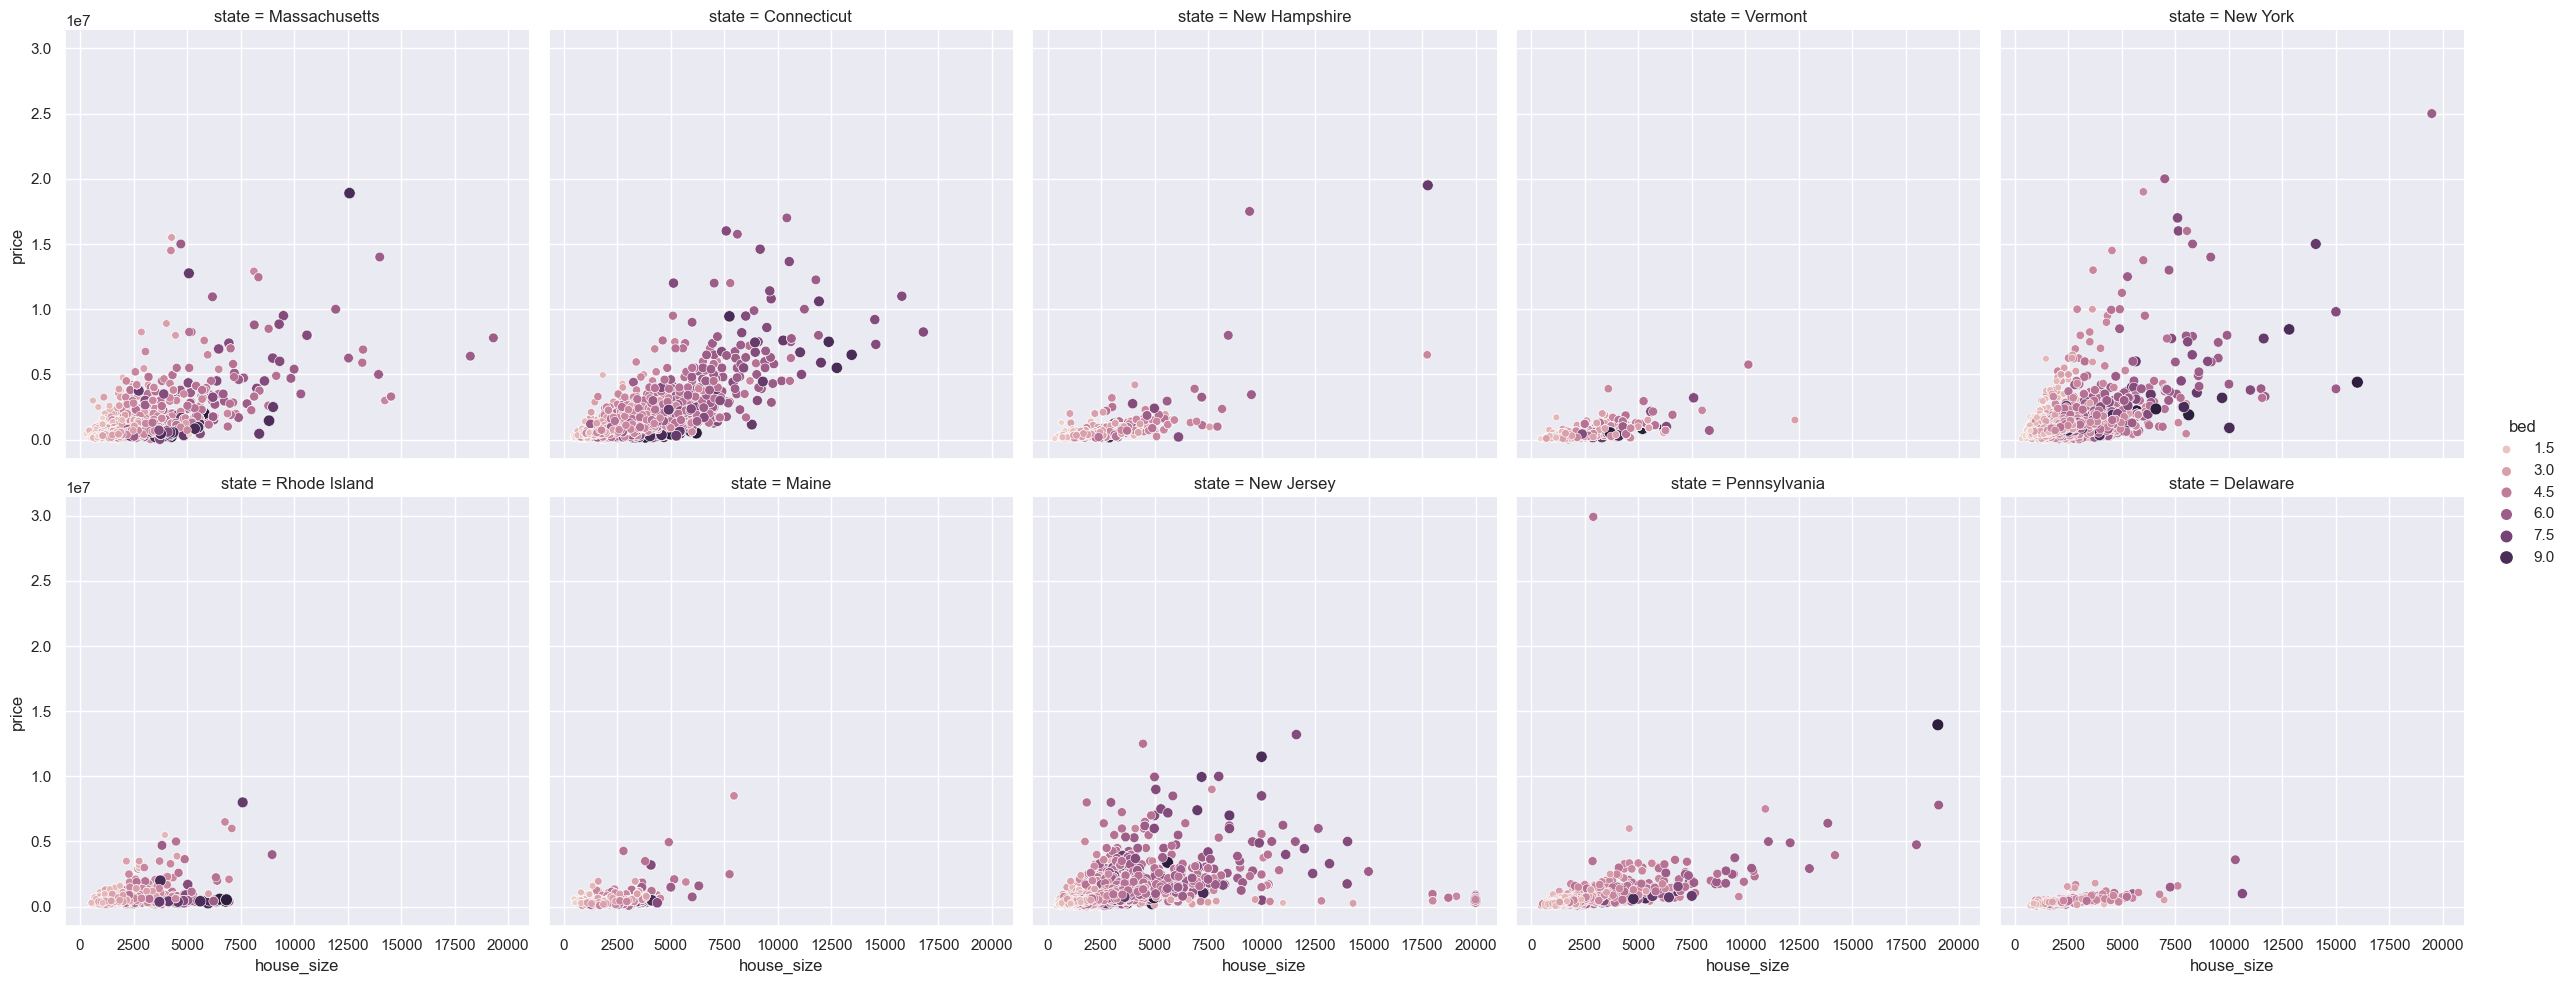

In [47]:
sns.relplot(
    data=df,
    x="house_size", y="price", col="state",
    hue="bed", size="bed", col_wrap=5
)

Funkce `relplot()` se tak jmenuje proto, že je určena k vizualizaci mnoha různých statistických vztahů. Zatímco rozptylové grafy jsou často efektivní, vztahy, kde jedna proměnná představuje časovou míru, jsou lépe reprezentovány přímkou. Funkce `relplot()` má užitečný parametr kind, který umožňuje snadno přepnout na tuto alternativní reprezentaci:

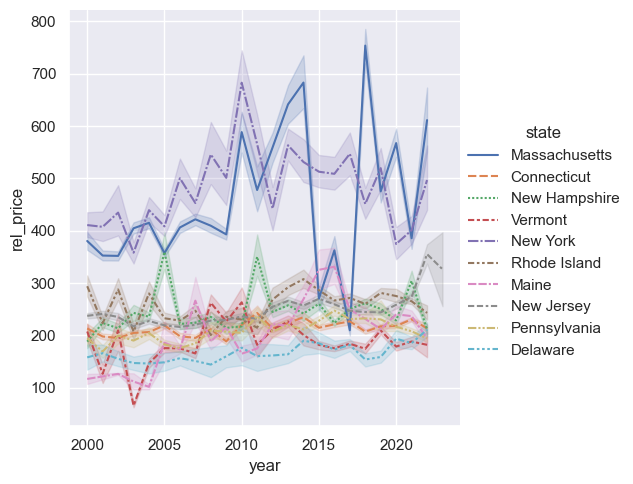

In [48]:
sns.relplot(
    data=df, kind="line",
    x="year", y="rel_price",
    hue="state", style="state"
)

## Statistický odhad

Často nás zajímá průměrná hodnota jedné proměnné jako funkce jiných proměnných. Při odhadu statistických hodnot Seaborn výpočte interval spolehlivosti představující nejistotu odhadu. 

Statistické odhady v seabornu přesahují rámec popisné statistiky. Například je možné vylepšit rozptylový graf zahrnutím lineárního regresního modelu (a jeho nejistoty) pomocí funkce `lmplot()`:

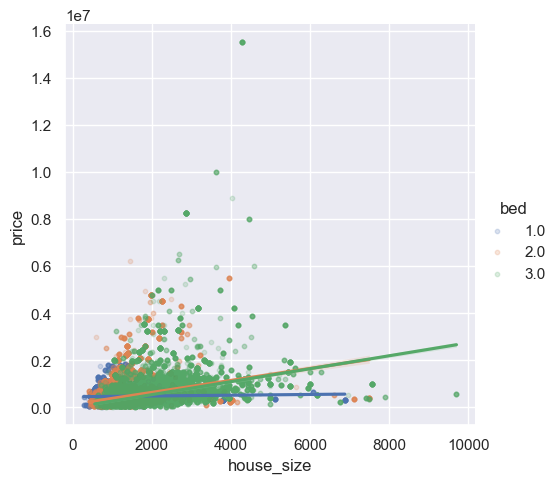

In [72]:
sns.lmplot(data=df[(df['bed'] < 4) & (df['house_size'] < 1e4)], 
           x="house_size", 
           y="price",
           hue="bed",
           scatter_kws={'alpha': 0.2, 's': 10})

## Reprezentace distribuce

Statistické analýzy vyžadují znalosti o rozdělení proměnných v souboru dat. Funkce seaborn `displot()` podporuje několik přístupů k vizualizaci rozdělení. Patří mezi ně klasické techniky, jako jsou histogramy:

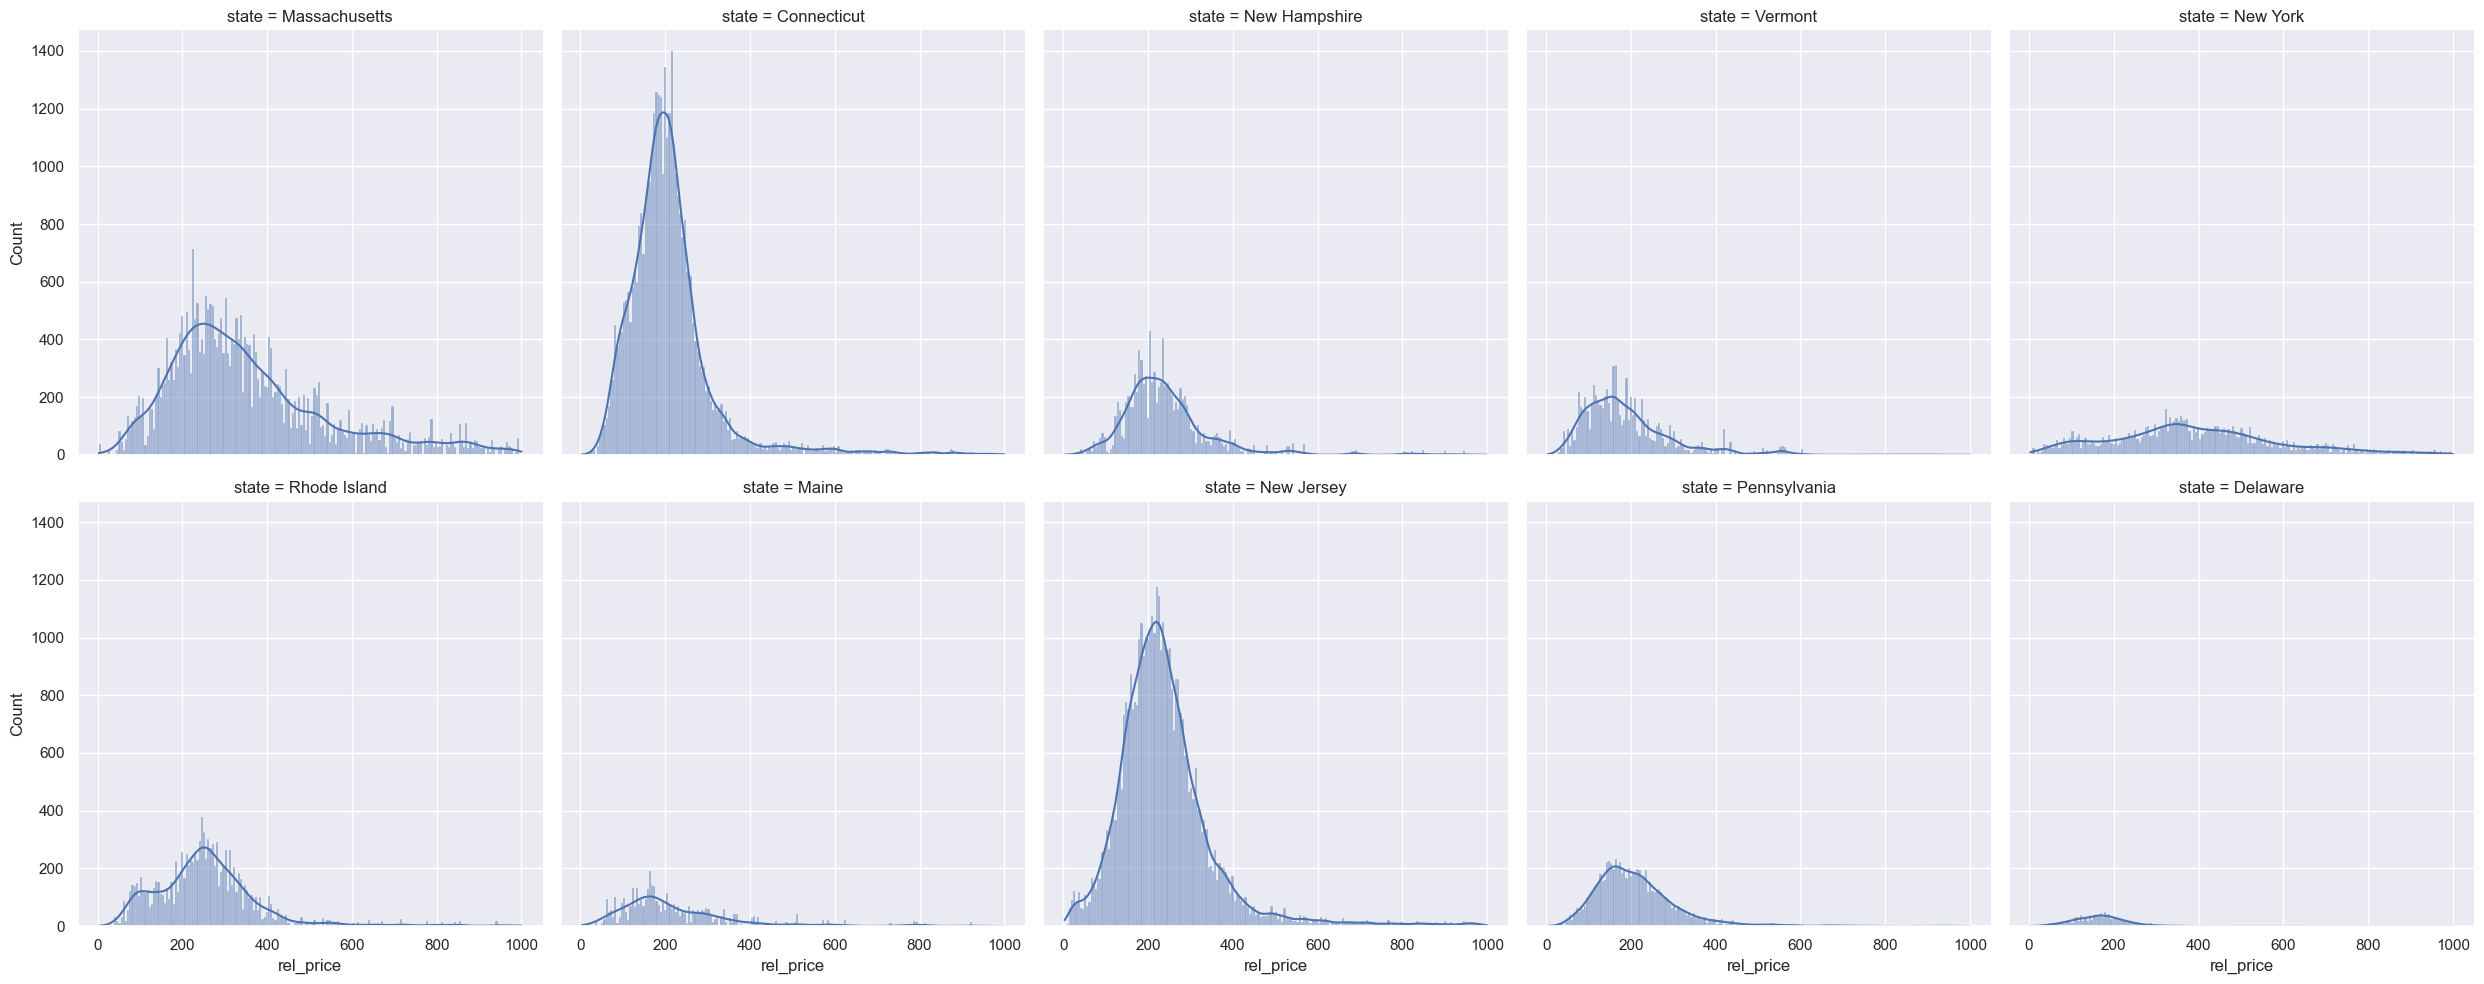

In [75]:
sns.displot(data=df[df["rel_price"] < 1000], x="rel_price", col="state", kde=True, col_wrap=5)

## Grafy pro kategoriální data
Několik specializovaných typů grafů v Seabornu je zaměřeno na vizualizaci kategoriálních dat. Lze k nim přistupovat pomocí funkce `catplot()`. Tyto grafy nabízejí různé úrovně granularity. Na nejjemnější úrovni můžete chtít zobrazit každé pozorování vykreslením "rojového" grafu: grafu rozptylu, který upravuje polohu bodů podél kategoriální osy tak, aby se nepřekrývaly:

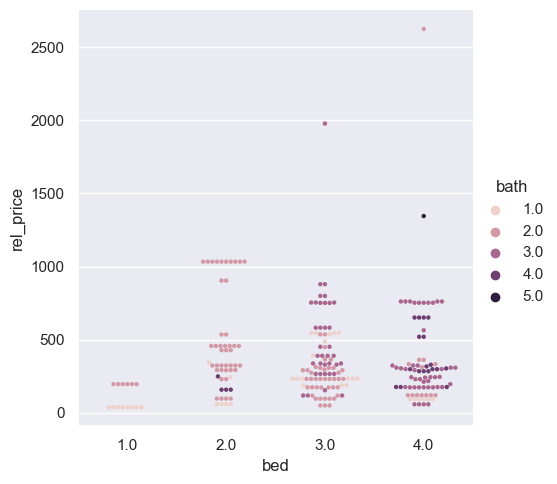

In [91]:
sns.catplot(data=df[(df['year'] == 2020) & (df['state'] == 'New York') & (df['bed'] < 5)], 
            kind="swarm", 
            x="bed", 
            y="rel_price", 
            hue="bath",
            s = 10)

Alternativně byste mohli použít odhad hustoty jádra, který by reprezentoval základní rozdělení, z něhož jsou body vzorkovány:

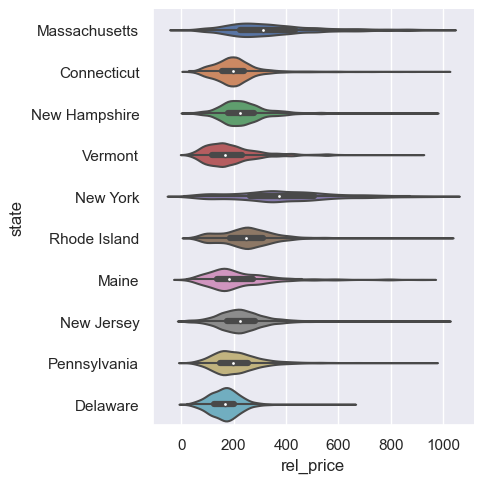

In [99]:
sns.catplot(data=df[df["rel_price"] < 1000], kind="violin", x="rel_price", y="state", orient='h')

## Vícerozměrné pohledy na složité soubory dat
Některé funkce seaborn kombinují více druhů grafů, aby rychle poskytly informativní shrnutí datové sady. Jedna z nich, `jointplot()`, se zaměřuje na jeden vztah. Vykresluje společné rozdělení dvou proměnných spolu s rozdělením každé proměnné:

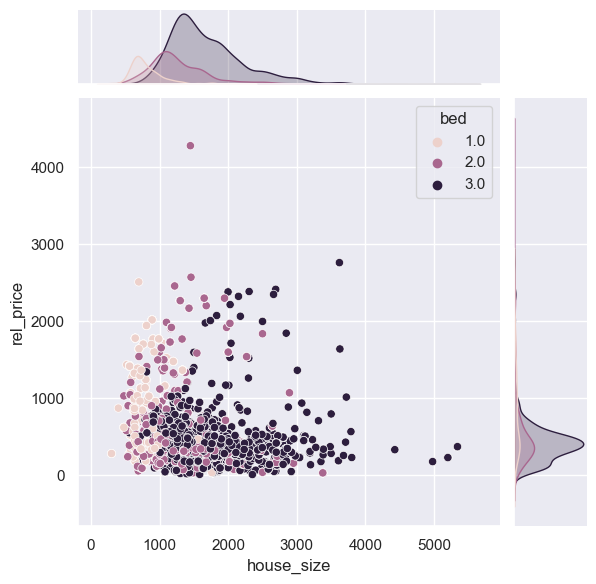

In [105]:
sns.jointplot(data=df[(df['state']=='New York') & (df['bed'] < 4)], x="house_size", y="rel_price", hue='bed')

Druhá funkce, `pairplot()`, má širší pohled: zobrazuje společné a okrajové rozdělení pro všechny párové vztahy, respektive pro každou proměnnou:

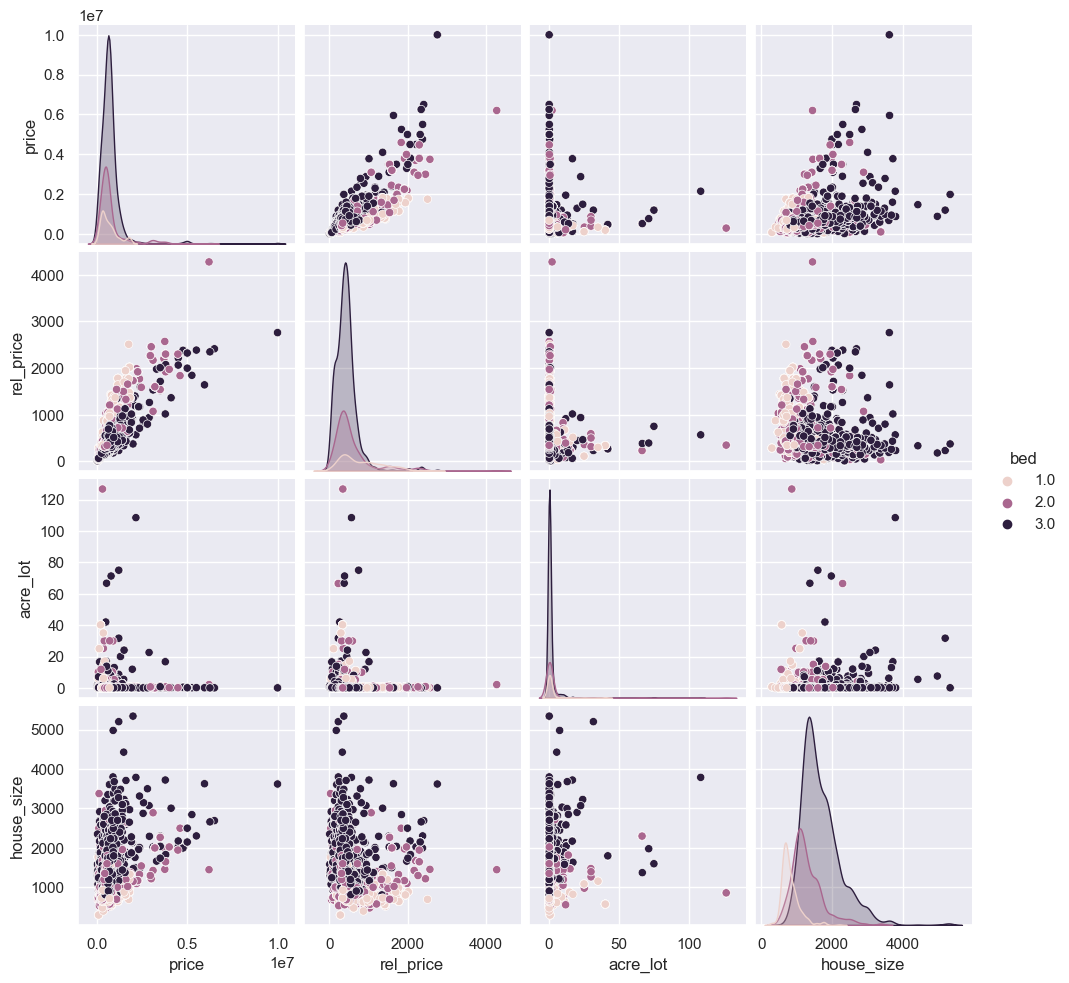

In [108]:
sns.pairplot(data=df[(df['state']=='New York') & (df['bed'] < 4)], vars=['price', 'rel_price', 'acre_lot', 'house_size'], hue='bed')